In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline


In last week's lab you were asked to propose a method to find where is the sky in a picture. A more general version of this task is called image segmentation, where we attempt to split an image into regions that are the same 'thing'. In this lab, we will attempt to implement a simple model.

# How do we define a segment?

We can work with a simplistic model that the same 'thing' will have similar color. If we make this assumption, we can make use of clustering algorithms to attempt segmentation.

## Exercise 1

1. Give 1 potential pitfall when using such a simplistic assumption

The problem arises simply when the "thing" isn't the same color. For example, segmenting the fruits out of an image might be hard with this model because fruits are generally not the same color.

# Segmentation using K-Means

As we have learnt from the previous lab, an image is merely a collection of RGB values. We can ignore the spatial arrangement of every pixel, and treat each one of them as a 3-dimensional vector. Pixels with similar RGB values will be close to each other in a 3 dimensional space.

This will allow us to formulate the segmentation problem as follows:
1. Decide on the number of segments,$k$, in the image
2. Reshape the image into a $(w*h) \times 3$ vector, where each row is a pixel's RGB values
3. Run the K-Means algorithm using this as the training data. 

To visualize the clustering, you might want to replace all pixels in the cluster with a single color. 

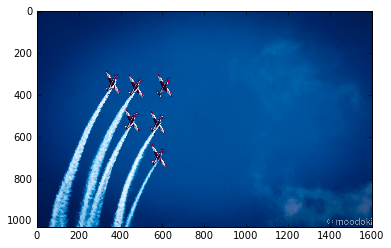

In [2]:
from sklearn.cluster import KMeans

# Read in the image file and convert it into a numpy array
img = np.array(Image.open('data/roulettes.jpg'))
plt.imshow(img)
num_colors = img.shape[2]

In [3]:
def kMeans_calc(img,k,num_colors = 3):   
    h = img.shape[0]
    w = img.shape[1]
    #Reshape
    new_img = np.reshape(img,((h*w),num_colors))
    #Cluster
    k_means = KMeans(n_clusters = k)
    k_means.fit(new_img)
    return k_means.labels_

In [4]:

def img_clust_colored(labels, k ,w =1600 ,h = 1029,num_colors = 3,img = None):
    # if image is provided make sure we have the right dimensions
    try:
        h = img.shape[0]
        w = img.shape[1]
        num_colors = img.shape[2]
    #otherwise continue with default
    except:
        pass
    #create a new image that has the same number of pixels as the old one
    n_image = np.zeros((w*h,num_colors))
    col = plt.cm.viridis(np.linspace(0,1,k))
    for i in xrange (0,len(labels)):
        for cur_k in xrange(0,k):
            if labels[i] == cur_k:
                n_image[i] = col[cur_k][0:3]
    r_tup = (h,w,num_colors)
    #Reshape to actual image dimensions
    return np.reshape(n_image,r_tup)

## Exercise 2

1. Implement the algorithm described above
2. Try a different number of clusters (3, 10, 20)

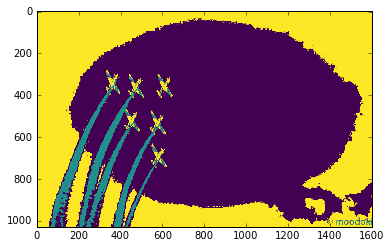

In [5]:
#Run the K-Means with k = 3
k = 3
labels = kMeans_calc(img,k)
final = img_clust_colored(labels, k ,num_colors = 3)
plt.imshow(final)

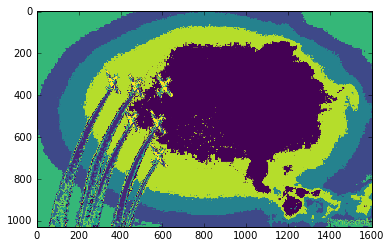

In [6]:
#Run the K-Means with k = 10
k = 10
labels = kMeans_calc(img,k)
final = img_clust_colored(labels, k ,num_colors = 3)
plt.imshow(final)

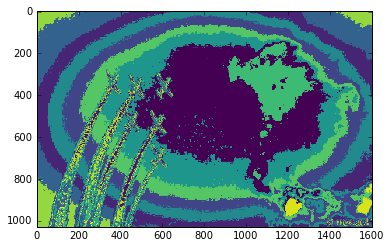

In [7]:
#Run the K-Means with k = 20
k = 20
labels = kMeans_calc(img,k)
final = img_clust_colored(labels, k ,num_colors = 3)
plt.imshow(final)